<a href="https://colab.research.google.com/github/ksehrawat/Capstone-Project/blob/main/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tabulate

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
sns.set(style="whitegrid")


# **Dataframe**

In [ ]:
file_path = '/content/drive/MyDrive/AI Capstone Project/NewRedfinDataSet.csv'
Redfin_df = pd.read_csv(file_path)

In [ ]:
print(Redfin_df.head().to_markdown(index=False, numalign="left", stralign="left"))

| period_begin   | period_end   | period_duration   | region_type   | region_type_id   | table_id   | is_seasonally_adjusted   | ZipCode   | state      | state_code   | property_type             | property_type_id   | median_sale_price   | median_sale_price_mom   | median_sale_price_yoy   | median_list_price   | median_list_price_mom   | median_list_price_yoy   | median_ppsf   | median_ppsf_mom   | median_ppsf_yoy   | median_list_ppsf   | median_list_ppsf_mom   | median_list_ppsf_yoy   | homes_sold   | homes_sold_mom   | homes_sold_yoy   | pending_sales   | pending_sales_mom   | pending_sales_yoy   | new_listings   | new_listings_mom   | new_listings_yoy   | inventory   | inventory_mom   | inventory_yoy   | median_dom   | median_dom_mom   | median_dom_yoy   | avg_sale_to_list   | avg_sale_to_list_mom   | avg_sale_to_list_yoy   | sold_above_list   | sold_above_list_mom   | sold_above_list_yoy   | off_market_in_two_weeks   | off_market_in_two_weeks_mom   | off_market_in_two_weeks_yoy   |

In [ ]:
Redfin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66577 entries, 0 to 66576
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   period_begin                    66577 non-null  object 
 1   period_end                      66577 non-null  object 
 2   period_duration                 66577 non-null  int64  
 3   region_type                     66577 non-null  object 
 4   region_type_id                  66577 non-null  int64  
 5   table_id                        66577 non-null  int64  
 6   is_seasonally_adjusted          66577 non-null  object 
 7   ZipCode                         66577 non-null  int64  
 8   state                           66577 non-null  object 
 9   state_code                      66577 non-null  object 
 10  property_type                   66577 non-null  object 
 11  property_type_id                66577 non-null  int64  
 12  median_sale_price               

# **Data Analysis and Cleaning**

In [ ]:
# Print descriptive statistics for all numeric columns

print("\nDescriptive Statistics for Numeric Columns:\n")
print(Redfin_df.describe().to_markdown(numalign="left", stralign="left"))

# For all object type columns, print the number of distinct values and the most frequent value

print("\nObject Column Summaries:\n")
for col in Redfin_df.select_dtypes(include='object'):
    print(f"Column: {col}")
    print(f"  Number of distinct values: {Redfin_df[col].nunique()}")
    print(f"  Most frequent value: {Redfin_df[col].mode()[0]}\n")


Descriptive Statistics for Numeric Columns:

|       | period_duration   | region_type_id   | table_id   | ZipCode   | property_type_id   | median_sale_price   | median_sale_price_mom   | median_sale_price_yoy   | median_list_price   | median_list_price_mom   | median_list_price_yoy   | median_ppsf   | median_ppsf_mom   | median_ppsf_yoy   | median_list_ppsf   | median_list_ppsf_mom   | median_list_ppsf_yoy   | homes_sold   | homes_sold_mom   | homes_sold_yoy   | pending_sales   | pending_sales_mom   | pending_sales_yoy   | new_listings   | new_listings_mom   | new_listings_yoy   | inventory   | inventory_mom   | inventory_yoy   | median_dom   | median_dom_mom   | median_dom_yoy   | avg_sale_to_list   | avg_sale_to_list_mom   | avg_sale_to_list_yoy   | sold_above_list   | sold_above_list_mom   | sold_above_list_yoy   | off_market_in_two_weeks   | off_market_in_two_weeks_mom   | off_market_in_two_weeks_yoy   | parent_metro_region_metro_code   |
|:------|:------------------|:-----------

In [ ]:
# Print the count and percentage of missing values for each column
missing_values = Redfin_df.isnull().sum()
missing_percent = (missing_values / len(Redfin_df)) * 100
print("Missing Values:\n")
print(pd.concat([missing_values, missing_percent], axis=1, keys=['Count', 'Percentage']).sort_values(by='Count', ascending=False).to_markdown(numalign="left", stralign="left"))

Missing Values:

|                                | Count   | Percentage   |
|:-------------------------------|:--------|:-------------|
| inventory_yoy                  | 12894   | 19.367       |
| inventory_mom                  | 10642   | 15.9845      |
| median_list_ppsf_yoy           | 10467   | 15.7216      |
| median_list_price_yoy          | 10168   | 15.2725      |
| new_listings_yoy               | 10161   | 15.262       |
| avg_sale_to_list_yoy           | 9386    | 14.098       |
| off_market_in_two_weeks_yoy    | 9165    | 13.766       |
| pending_sales_yoy              | 9165    | 13.766       |
| median_list_ppsf_mom           | 7660    | 11.5055      |
| inventory                      | 7453    | 11.1946      |
| median_list_price_mom          | 7387    | 11.0954      |
| new_listings_mom               | 7376    | 11.0789      |
| median_ppsf_yoy                | 7326    | 11.0038      |
| median_dom_yoy                 | 7318    | 10.9918      |
| median_sale_price_yoy

In [ ]:
# Drop all rows with missing values

Redfin_df_cleaned = Redfin_df.dropna()

# Display updated dataset info and first few rows
Redfin_df_dropped_info = Redfin_df_cleaned.info()
Redfin_df_dropped_preview = print(Redfin_df_cleaned.head().to_markdown(index=False, numalign="left", stralign="left"))

Redfin_df_dropped_info, Redfin_df_dropped_preview

<class 'pandas.core.frame.DataFrame'>
Index: 47547 entries, 0 to 66576
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   period_begin                    47547 non-null  object 
 1   period_end                      47547 non-null  object 
 2   period_duration                 47547 non-null  int64  
 3   region_type                     47547 non-null  object 
 4   region_type_id                  47547 non-null  int64  
 5   table_id                        47547 non-null  int64  
 6   is_seasonally_adjusted          47547 non-null  object 
 7   ZipCode                         47547 non-null  int64  
 8   state                           47547 non-null  object 
 9   state_code                      47547 non-null  object 
 10  property_type                   47547 non-null  object 
 11  property_type_id                47547 non-null  int64  
 12  median_sale_price               47547

(None, None)

In [ ]:
# Print the count and percentage of missing values for each column
missing_values = Redfin_df_cleaned.isnull().sum()
missing_percent = (missing_values / len(Redfin_df_cleaned)) * 100
print("Missing Values:\n")
print(pd.concat([missing_values, missing_percent], axis=1, keys=['Count', 'Percentage']).sort_values(by='Count', ascending=False).to_markdown(numalign="left", stralign="left"))

Missing Values:

|                                | Count   | Percentage   |
|:-------------------------------|:--------|:-------------|
| period_begin                   | 0       | 0            |
| period_end                     | 0       | 0            |
| period_duration                | 0       | 0            |
| region_type                    | 0       | 0            |
| region_type_id                 | 0       | 0            |
| table_id                       | 0       | 0            |
| is_seasonally_adjusted         | 0       | 0            |
| ZipCode                        | 0       | 0            |
| state                          | 0       | 0            |
| state_code                     | 0       | 0            |
| property_type                  | 0       | 0            |
| property_type_id               | 0       | 0            |
| median_sale_price              | 0       | 0            |
| median_sale_price_mom          | 0       | 0            |
| median_sale_price_yoy

The dataset now contains only rows without missing values:

**Total Rows: 47,547**

**Columns: 50**

The data is fully clean with no missing values

**Remove Outliers from the Dataset**

In [ ]:
# Remove Outliers from the Dataset
Q1 = Redfin_df_cleaned['median_sale_price'].quantile(0.25)
Q3 = Redfin_df_cleaned['median_sale_price'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
Redfin_df_cleaned = Redfin_df_cleaned[(Redfin_df_cleaned['median_sale_price'] >= lower_bound) &
                        (Redfin_df_cleaned['median_sale_price'] <= upper_bound)]

**Outliers:**

Outliers in median_sale_price were removed based on the Interquartile Range (IQR) method.

**Total Rows: 44723**


**Median_sale_price Statistics:**

Minimum: $1,800

Maximum: $1,521,000

Mean: $522,755

Median: $442,000

**Exporting and Saving Clean Dataset to Google Share Drive**

In [ ]:
# Exporting and Saving Clean Dataset to Google Share Drive
export_path = '/content/drive/MyDrive/AI Capstone Project/Redfin_df_cleaned.csv'
Redfin_df_cleaned.to_csv(export_path, index=False)


# **Data Visualization**

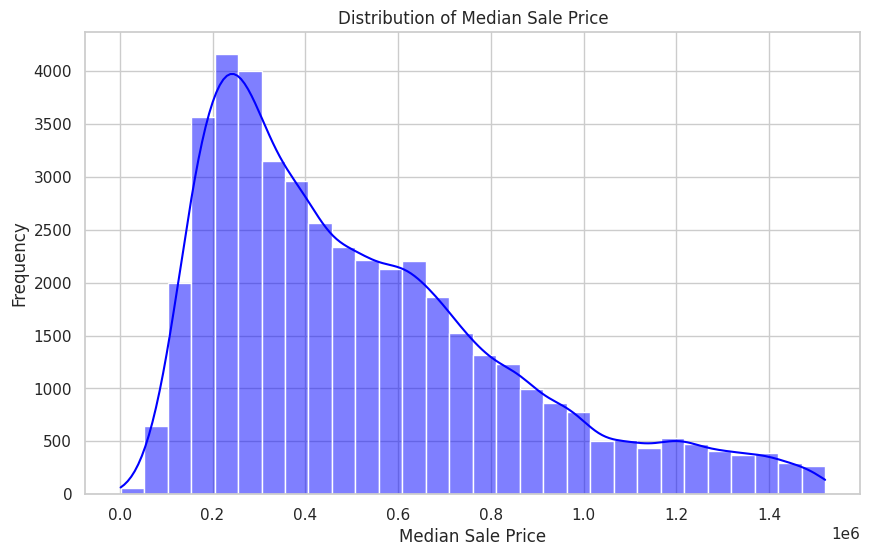

In [ ]:
# Visualization 1: Distribution of Median Sale Price
plt.figure(figsize=(10, 6))
sns.histplot(Redfin_df_cleaned['median_sale_price'], kde=True, bins=30, color='blue')
plt.title("Distribution of Median Sale Price")
plt.xlabel("Median Sale Price")
plt.ylabel("Frequency")
plt.show()

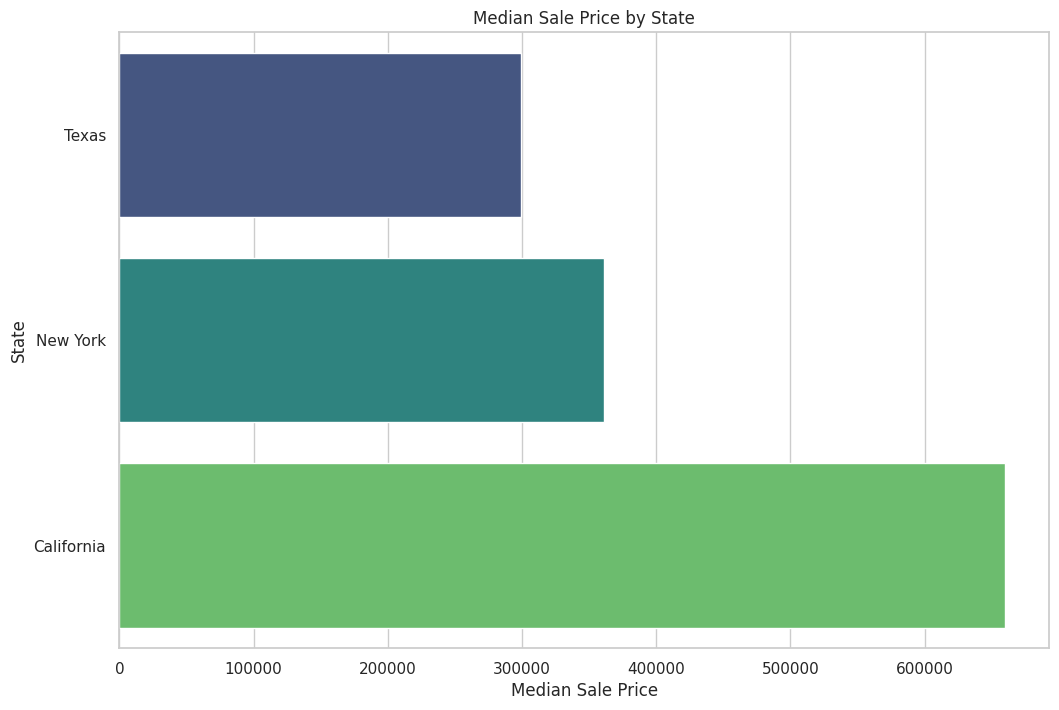

In [ ]:
# Visualization 2: Median Sale Price by State
plt.figure(figsize=(12, 8))
state_price = Redfin_df_cleaned.groupby('state')['median_sale_price'].median().sort_values()
sns.barplot(y=state_price.index, x=state_price.values, palette="viridis", legend=False, hue = state_price.index)
plt.title("Median Sale Price by State")
plt.xlabel("Median Sale Price")
plt.ylabel("State")
plt.show()





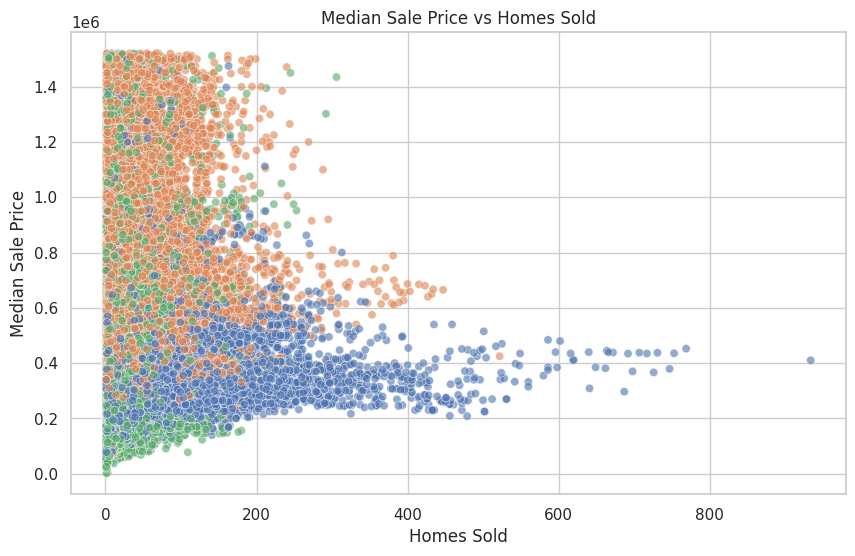

In [ ]:
# Visualization 3: Median Sale Price vs Homes Sold
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Redfin_df_cleaned, x='homes_sold', y='median_sale_price', hue='state', alpha=0.6)
plt.title("Median Sale Price vs Homes Sold")
plt.xlabel("Homes Sold")
plt.ylabel("Median Sale Price")
plt.legend([], [], frameon=False)  # Hide legend for clarity
plt.show()

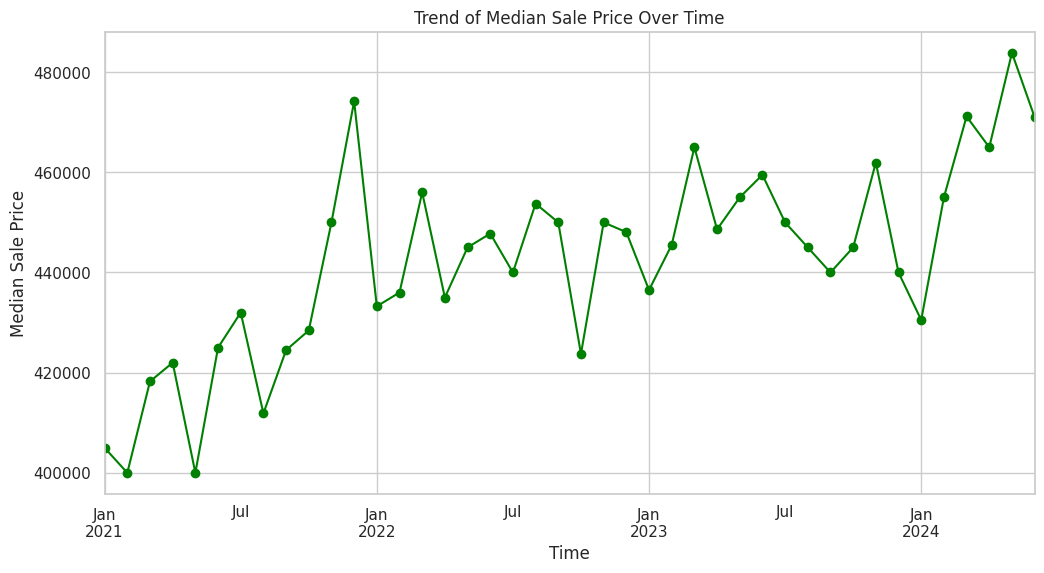

In [ ]:
# Visualization 4: Trend of Median Sale Price Over Time

# Convert `period_begin` to datetime with specified format
Redfin_df_cleaned['period_begin'] = pd.to_datetime(Redfin_df_cleaned['period_begin'], format='%m/%d/%y', errors='coerce')

# Trend of Median Sale Price Over Time
time_trend_updated = Redfin_df_cleaned.groupby('period_begin')['median_sale_price'].median()
plt.figure(figsize=(12, 6))
time_trend_updated.plot(marker='o', color='green')
plt.title("Trend of Median Sale Price Over Time")
plt.xlabel("Time")
plt.ylabel("Median Sale Price")
plt.grid(True)
plt.show()

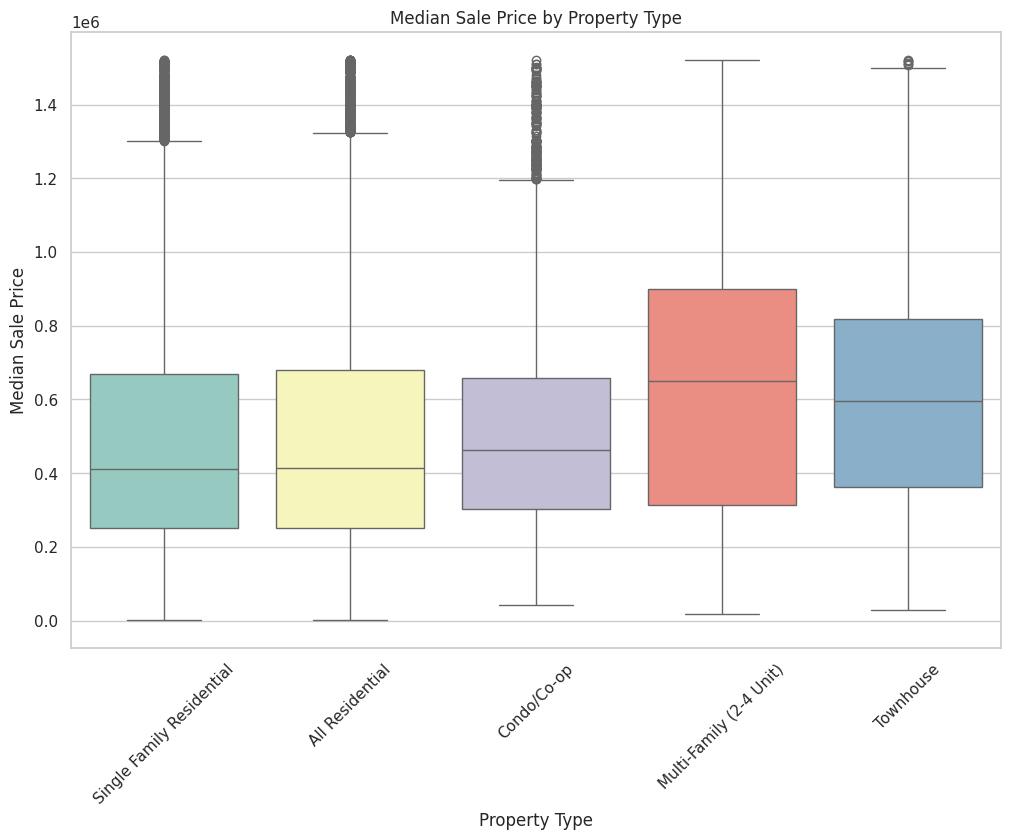

In [ ]:
# Visualization 5: Boxplot of Median Sale Price by Property Type
plt.figure(figsize=(12, 8))
sns.boxplot(data=Redfin_df_cleaned, x='property_type', y='median_sale_price', palette="Set3",legend=False, hue = 'property_type')
plt.title("Median Sale Price by Property Type")
plt.xlabel("Property Type")
plt.ylabel("Median Sale Price")
plt.xticks(rotation=45)
plt.show()

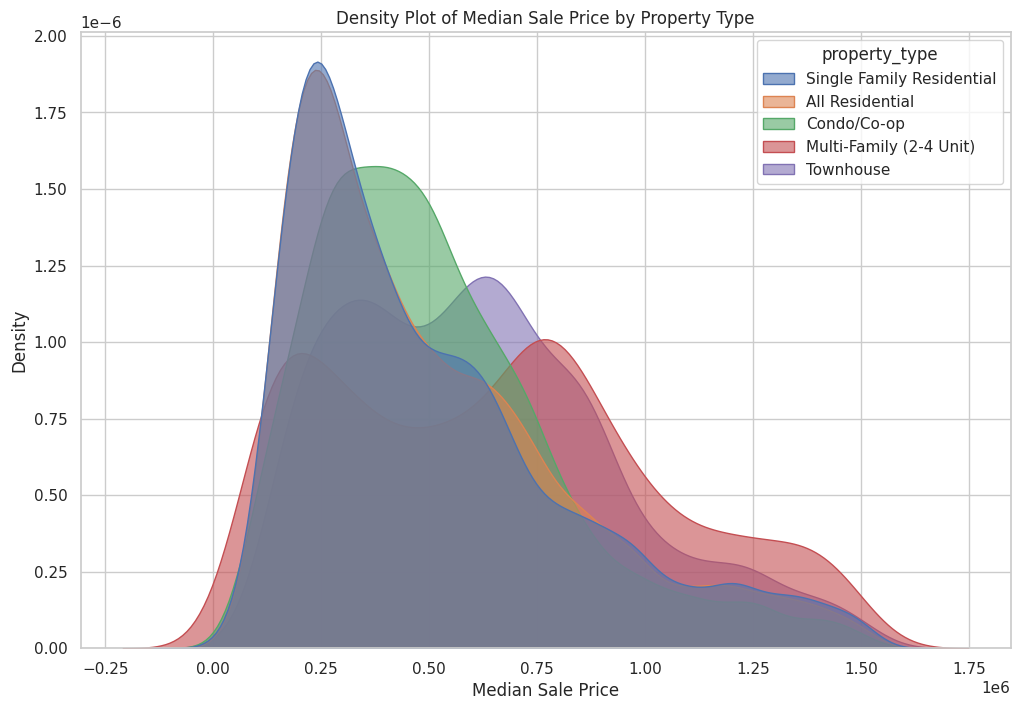

In [ ]:
# Visualization 6: Density Plot of Sale Price by Property Type
plt.figure(figsize=(12, 8))
sns.kdeplot(data=Redfin_df_cleaned, x='median_sale_price', hue='property_type', fill=True, common_norm=False, alpha=0.6)
plt.title("Density Plot of Median Sale Price by Property Type")
plt.xlabel("Median Sale Price")
plt.ylabel("Density")
plt.show()

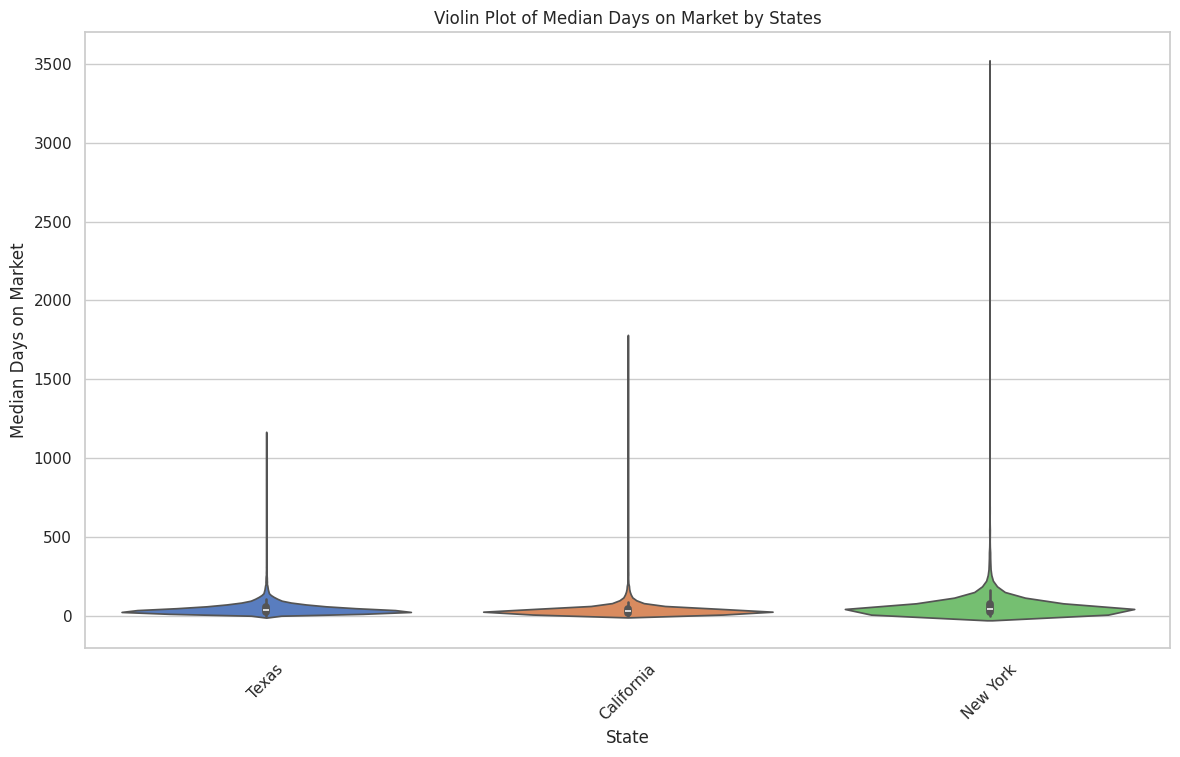

In [ ]:
# Visualization 7: Violin Plot of Days on Market by State
states = Redfin_df_cleaned['state'].value_counts().index
filtered_data = Redfin_df_cleaned[Redfin_df_cleaned['state'].isin(states)]

plt.figure(figsize=(14, 8))
sns.violinplot(data=filtered_data, x='state', y='median_dom', palette="muted", legend=False,hue = 'state',density_norm='width' )
plt.title("Violin Plot of Median Days on Market by States")
plt.xlabel("State")
plt.ylabel("Median Days on Market")
plt.xticks(rotation=45)
plt.show()

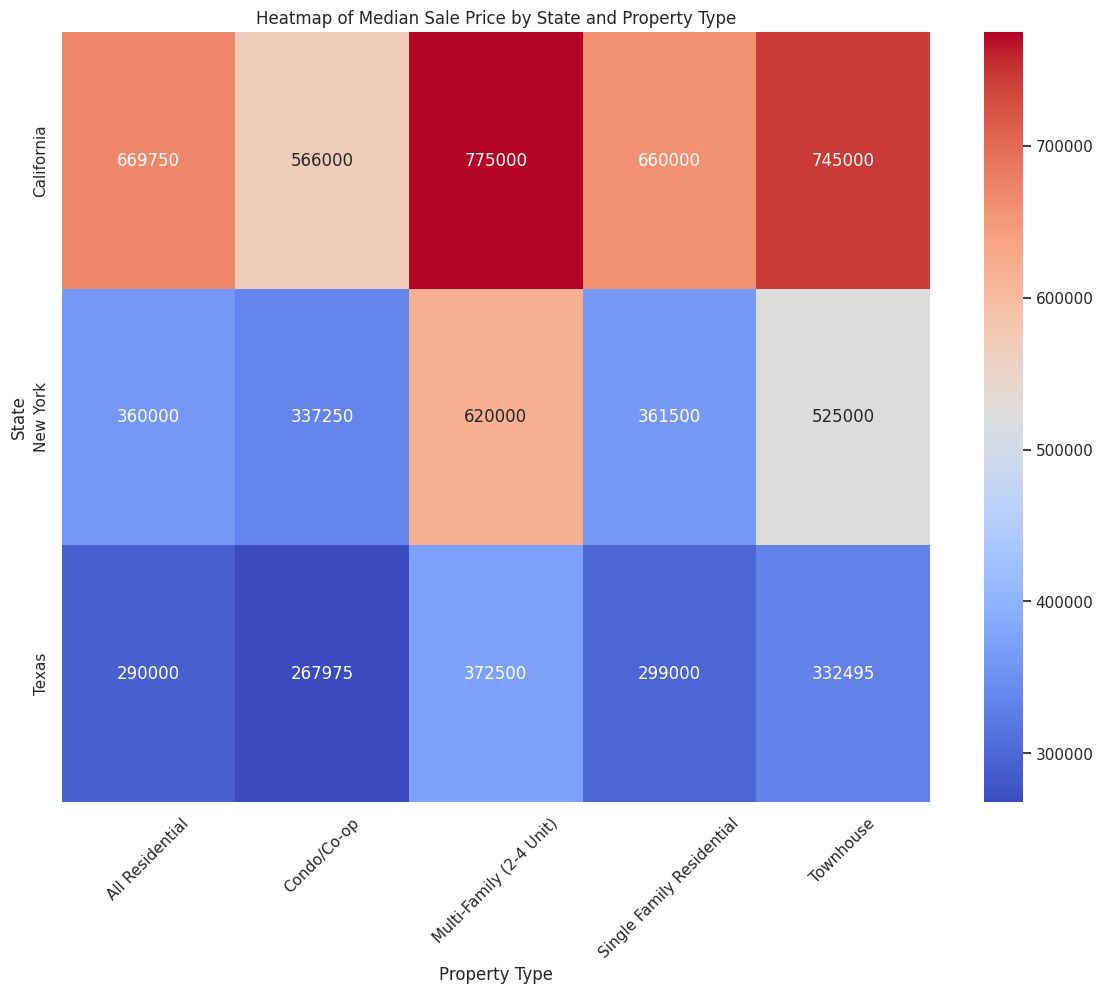

In [ ]:
# Visualization 8: Heatmap of Median Sale Price by State and Property Type
pivot_table = Redfin_df_cleaned.pivot_table(
    values='median_sale_price',
    index='state',
    columns='property_type',
    aggfunc='median'
)

plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='coolwarm', cbar=True)
plt.title("Heatmap of Median Sale Price by State and Property Type")
plt.xlabel("Property Type")
plt.ylabel("State")
plt.xticks(rotation=45)
plt.show()



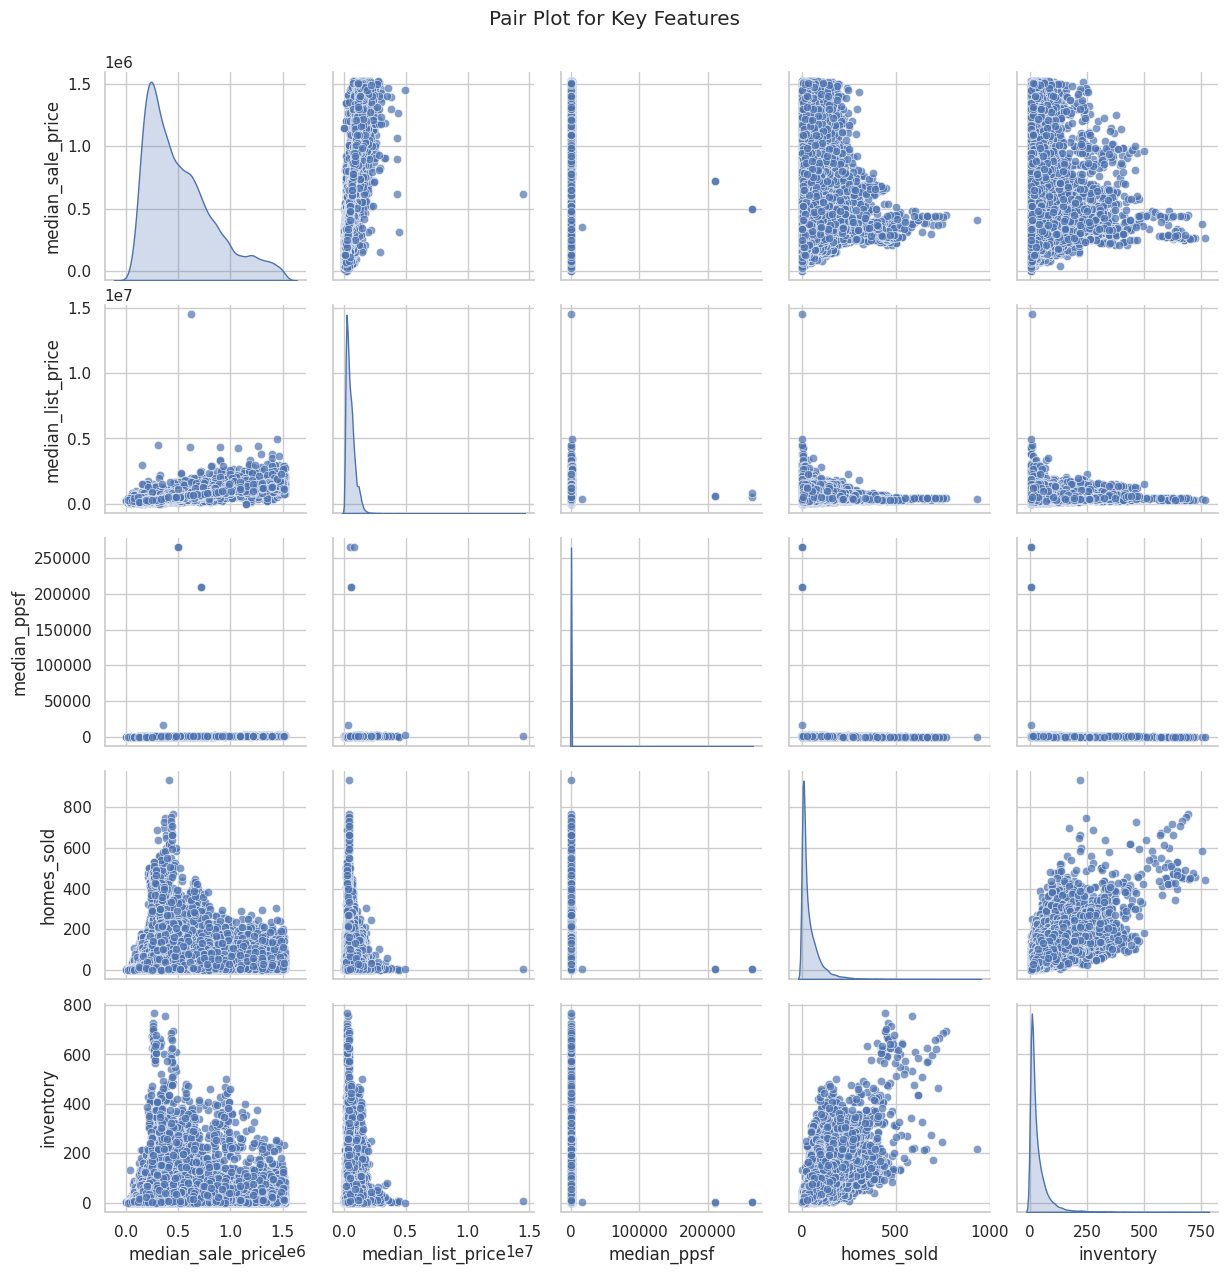

In [ ]:
# Visualization 9: Pair Plot for Key Features
key_features = ['median_sale_price', 'median_list_price', 'median_ppsf', 'homes_sold', 'inventory']

sns.pairplot(Redfin_df_cleaned[key_features], diag_kind="kde", plot_kws={"alpha": 0.7})
plt.suptitle("Pair Plot for Key Features", y=1.02)
plt.show()

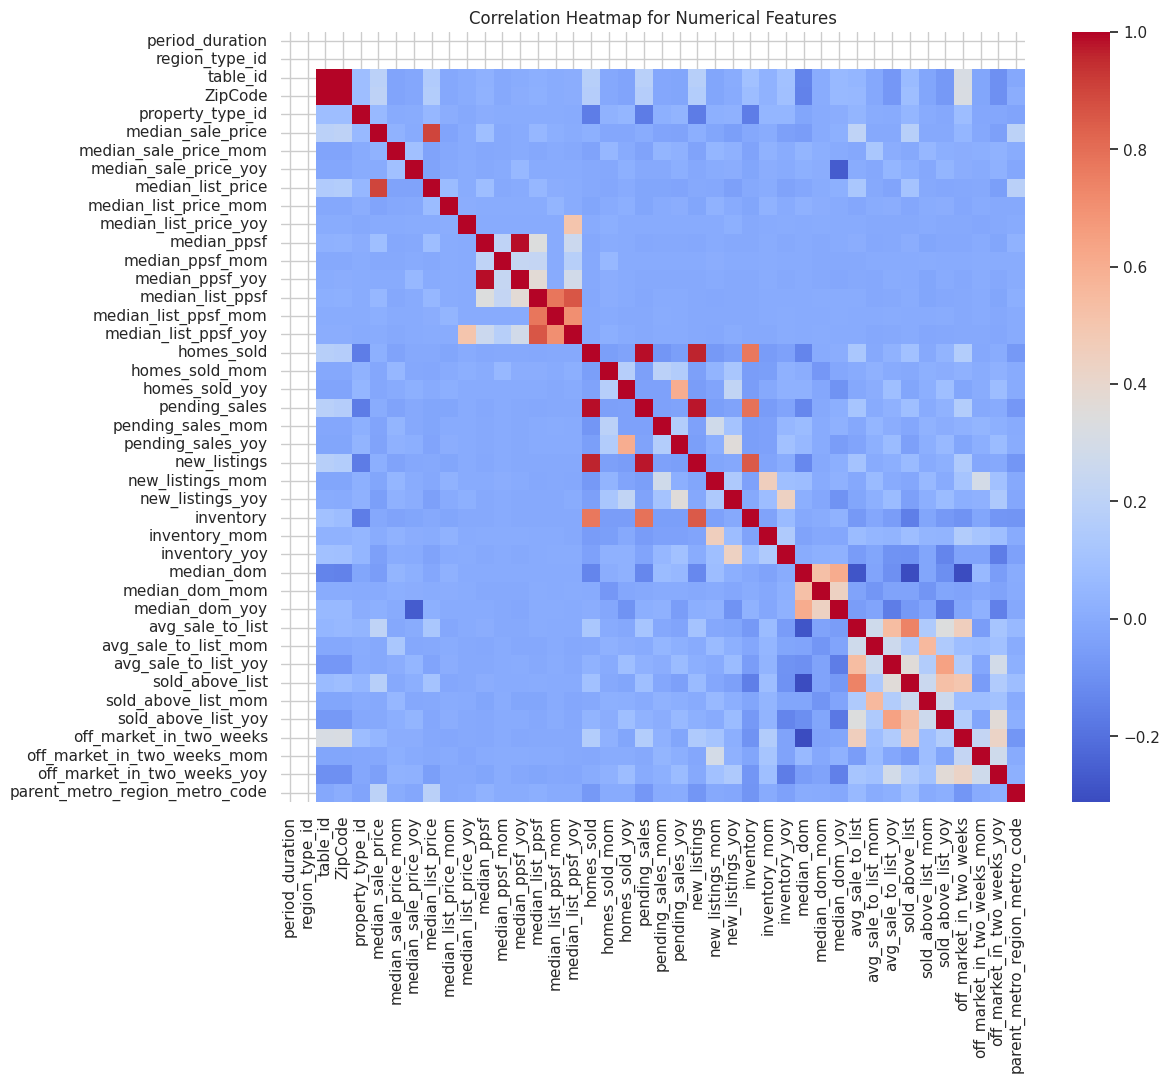

In [ ]:
# Visualization 10: Correlation Heatmap

# Extract only numerical columns for correlation analysis
numerical_columns = Redfin_df_cleaned.select_dtypes(include=['float64', 'int64'])
filtered_numerical_columns = numerical_columns.drop(columns=['table_id', 'region_type_id', 'ZipCode', 'property_type_id', 'parent_metro_region_metro_code'], errors='ignore')

# Compute correlation matrix for numerical columns
numerical_corr_matrix = numerical_columns.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(numerical_corr_matrix, cmap="coolwarm", annot=False, cbar=True)
plt.title("Correlation Heatmap for Numerical Features")
plt.show()

**Key Insights from the Correlation Heatmap:**

**Strong Positive Correlations:**

median_list_price and median_sale_price: A very high
positive correlation indicates that list prices are strong predictors of sale prices.

median_ppsf (price per square foot) and median_sale_price: Indicates that the price per square foot is a significant factor in determining sale prices.

**Moderate Positive Correlations:**

pending_sales and median_sale_price: Suggests that higher pending sales are associated with higher sale prices.

homes_sold and median_sale_price: Indicates a link between market activity (homes sold) and property values.

**Negative Correlations:**

median_dom (days on market) and median_sale_price: Properties with higher prices tend to spend fewer days on the market, reflecting higher demand.

inventory and median_sale_price: Suggests that increased inventory might pressure prices downward, likely due to supply-demand dynamics.

**Feature Clustering:**

Price-related metrics (e.g., median_list_price, median_ppsf) are tightly correlated, forming a cluster of features with shared predictive power.

Market activity metrics (e.g., homes_sold, pending_sales) show interdependence, highlighting their mutual influence on market conditions.

**Irrelevant or Weak Correlations:**

Metrics like off_market_in_two_weeks and its derivatives have little correlation with median_sale_price, suggesting limited predictive value for these features.

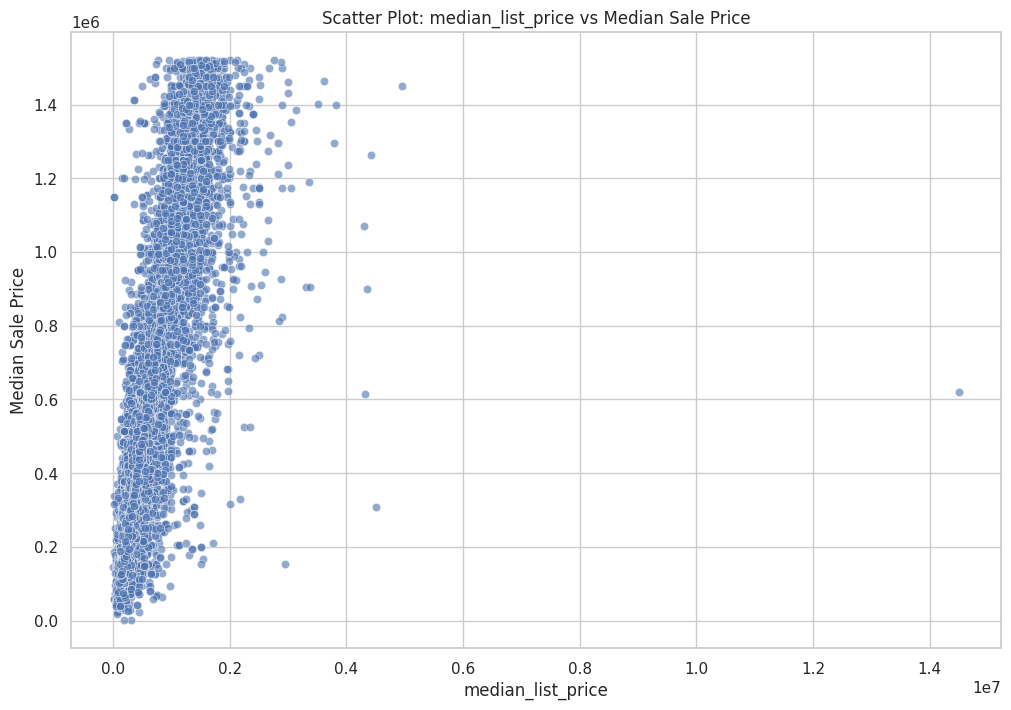

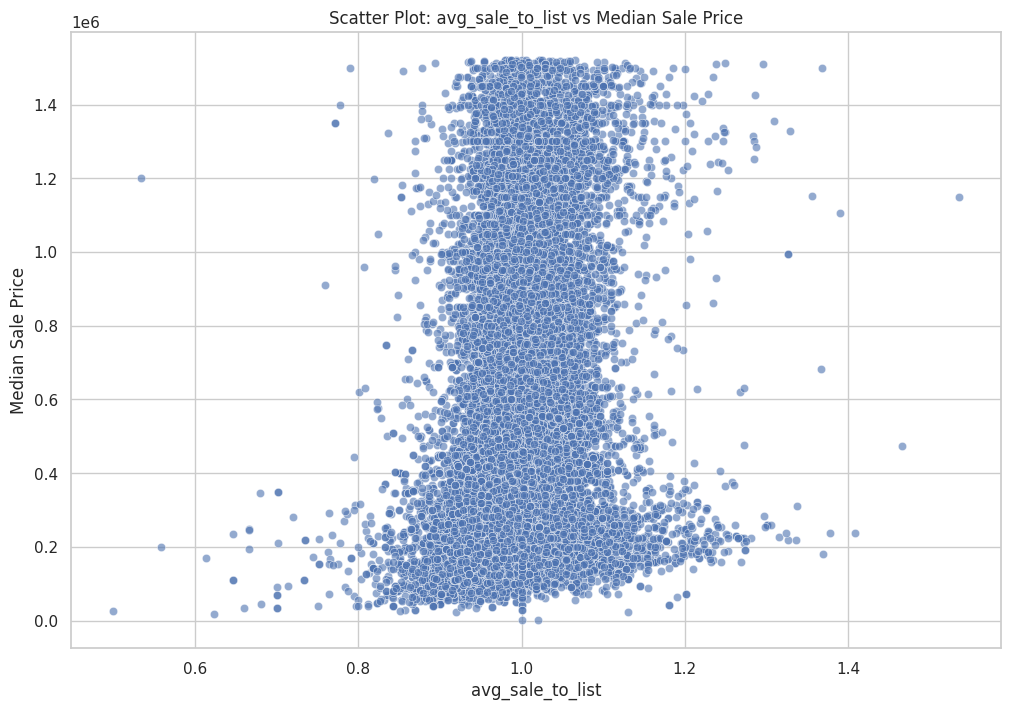

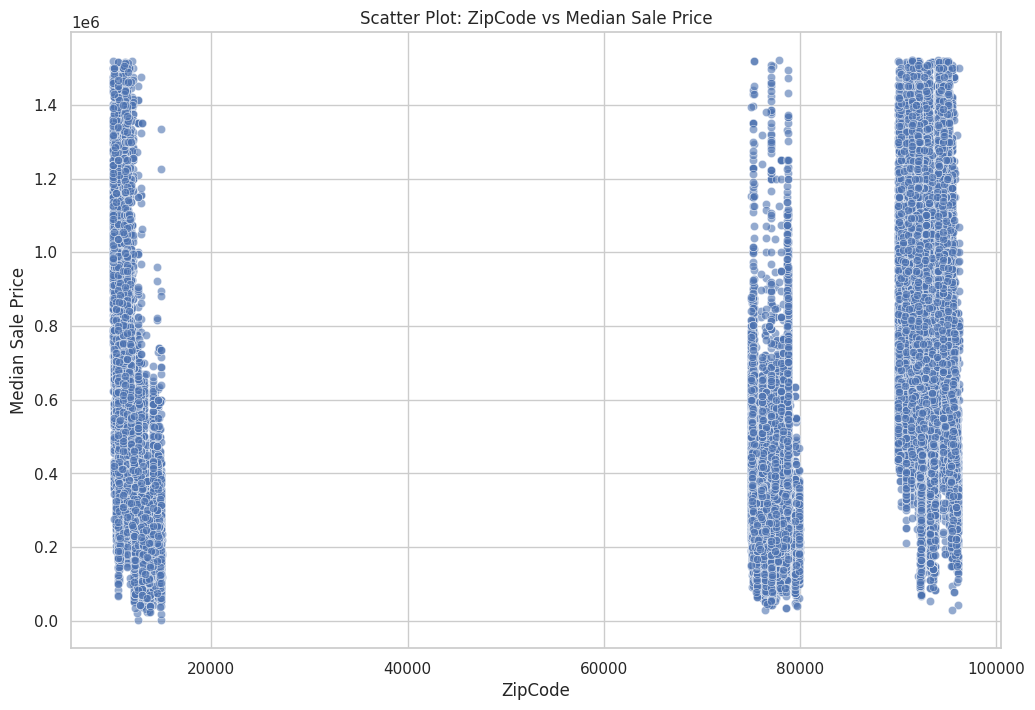

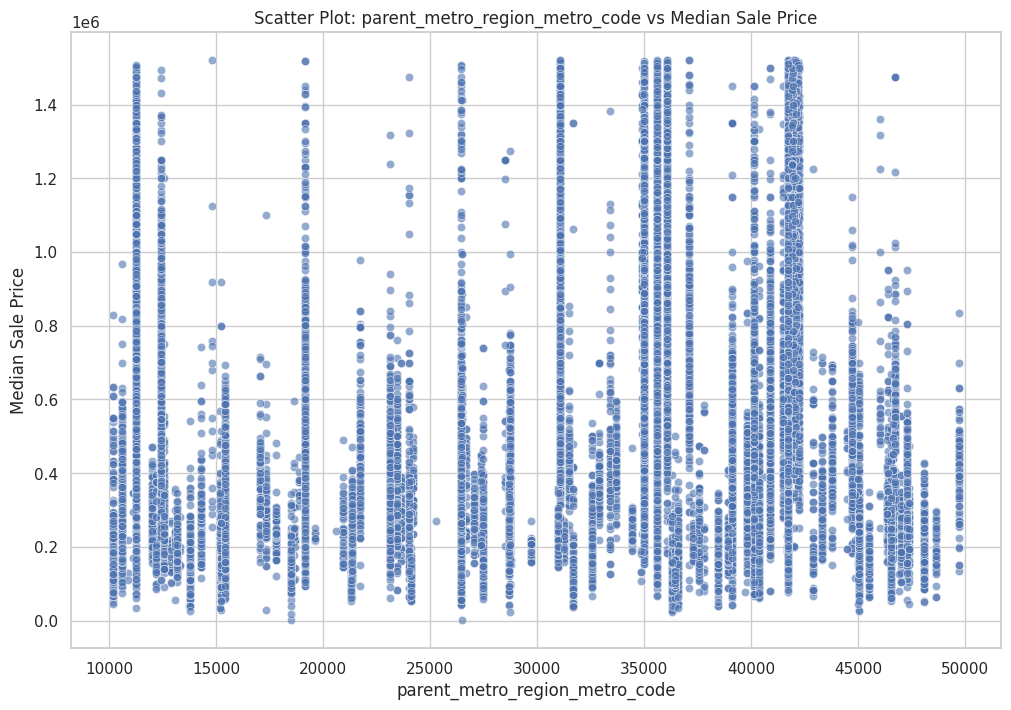

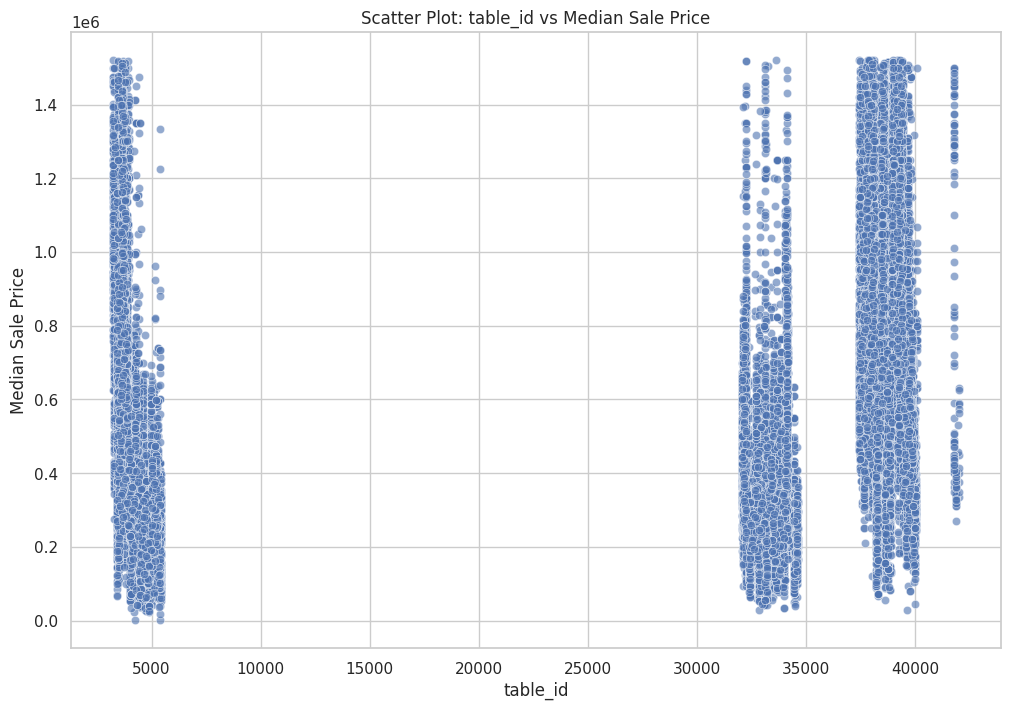

In [ ]:
# Identify key correlations with `median_sale_price`
key_correlations = numerical_corr_matrix['median_sale_price'].sort_values(ascending=False).iloc[1:6]

# Scatter plots for key correlations
for feature in key_correlations.index:
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=numerical_columns, x=feature, y='median_sale_price', alpha=0.6)
    plt.title(f"Scatter Plot: {feature} vs Median Sale Price")
    plt.xlabel(feature)
    plt.ylabel("Median Sale Price")
    plt.grid(True)
    plt.show()

In [ ]:
# Identify top features based on correlation with `median_sale_price`
correlations_with_target = numerical_corr_matrix['median_sale_price'].sort_values(ascending=False)

# Select the top 10 features most correlated with `median_sale_price` (excluding itself)
top_features = correlations_with_target.iloc[1:11]

# Display the top features
top_features


median_list_price                 0.900696
avg_sale_to_list                  0.209713
ZipCode                           0.203657
parent_metro_region_metro_code    0.199559
table_id                          0.190338
sold_above_list                   0.179736
median_ppsf                       0.083761
property_type_id                  0.061938
median_list_ppsf                  0.051634
off_market_in_two_weeks           0.046503
Name: median_sale_price, dtype: float64

**Top Features for Modeling:**

Based on their correlation with median_sale_price, the top features are:

**median_list_price:** (Correlation: 0.90) The strongest predictor of sale prices.

**avg_sale_to_list:**  Indicates how closely sale prices match listing prices.

**sold_above_list:** Reflects competitive markets where properties sell above the asking price.

**median_ppsf:** Price per square foot, an essential metric for value estimation.

**median_list_ppsf:** Listed price per square foot, a precursor for market valuation.

**off_market_in_two_weeks:** Percentage of properties off the market quickly, indicating high demand.

**median_sale_price_mom:** Month-over-month change in sale prices, indicating trends.

**median_dom_yoy:** Year-over-year change in days on the market, showing shifts in market dynamics.

**homes_sold:** A measure of market activity and absorption.

**new_listings:** Supply-side indicator for available inventory.


**Recommendations:**

These features can form the basis for predictive models like linear regression, decision trees, or ensemble methods.

Use median_list_price as the primary feature in initial models.

Normalize or transform variables with different scales (e.g., avg_sale_to_list).


# **Model:Linear Regression Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Select features and target variable
features = ['median_list_price', 'avg_sale_to_list', 'sold_above_list', 'median_ppsf',
            'median_list_ppsf', 'off_market_in_two_weeks', 'median_sale_price_mom',
            'median_dom_yoy', 'homes_sold', 'new_listings']
target = 'median_sale_price'

# Prepare the feature matrix (X) and target vector (y)
X = Redfin_df_cleaned[features]
y = Redfin_df_cleaned[target]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Output the evaluation metrics
mae, rmse, r2




(72240.56887953565, 169626.26859030992, 0.7252601904016482)

The linear regression model has been built and evaluated:

**Root Mean Squared Error (RMSE)**: $169,626.27 (indicates the average prediction error in monetary terms).

**R² Score**: 0.725 (72.5% of the variance in house prices is explained by the model).

**Perform feature engineering on the selected features**



In [ ]:
# Feature Engineering: Creating Additional Features

# Log transformation for skewed features
Redfin_df_cleaned['log_median_list_price'] = np.log1p(Redfin_df_cleaned['median_list_price'])
Redfin_df_cleaned['log_median_ppsf'] = np.log1p(Redfin_df_cleaned['median_ppsf'])

# Interaction terms
Redfin_df_cleaned['list_price_to_ppsf'] = Redfin_df_cleaned['median_list_price'] / (Redfin_df_cleaned['median_ppsf'] + 1)
Redfin_df_cleaned['sold_above_list_ratio'] = Redfin_df_cleaned['sold_above_list'] / (Redfin_df_cleaned['homes_sold'] + 1)

# New feature selection including engineered features
enhanced_features = ['log_median_list_price', 'avg_sale_to_list', 'sold_above_list_ratio',
                     'log_median_ppsf', 'list_price_to_ppsf', 'off_market_in_two_weeks',
                     'median_sale_price_mom', 'median_dom_yoy', 'homes_sold', 'new_listings']

# Prepare the feature matrix (X) and target vector (y)
X_enhanced = Redfin_df_cleaned[enhanced_features]
y = Redfin_df_cleaned['median_sale_price']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_enhanced, y, test_size=0.2, random_state=42)

# Train the Linear Regression model with enhanced features
enhanced_model = LinearRegression()
enhanced_model.fit(X_train, y_train)

# Predict on the test set
y_pred_enhanced = enhanced_model.predict(X_test)

# Evaluate the enhanced model
mae_enhanced = mean_absolute_error(y_test, y_pred_enhanced)
mse_enhanced = mean_squared_error(y_test, y_pred_enhanced)
rmse_enhanced = np.sqrt(mse_enhanced)
r2_enhanced = r2_score(y_test, y_pred_enhanced)

# Output the evaluation metrics for the enhanced model
mae_enhanced, rmse_enhanced, r2_enhanced


(99144.14132235257, 136041.4427747268, 0.8232832019391514)

# Enhanced Linear Regression Model Results (with Feature Engineering):

* Mean Absolute Error (MAE): $99,144

* Root Mean Squared Error (RMSE): $136,041

* R² Score: 0.823 (82.3% of variance in house prices explained by the model)


**Comparison with the Previous Model:**

* MAE: $99,144 (worsened)

* RMSE: $136,041 (improved)

* R² Score: 0.823 (improved)

**Key Takeaways:**

* Improved variance explanation: The model now explains 82.3% of the variance in house prices (compared to 72.5% before).

* Lower RMSE: Indicates more accurate overall predictions.

* Higher MAE: Suggests that individual prediction errors may have increased, possibly due to the logarithmic transformations.

**Analyze feature importance in the model**

In [ ]:
# Extract feature importance (coefficients) from the enhanced linear regression model
feature_importance = pd.DataFrame({
    'Feature': enhanced_features,
    'Coefficient': enhanced_model.coef_
}).sort_values(by='Coefficient', ascending=False)

# Display feature importance
feature_importance



Feature    Coefficient
0    log_median_list_price  337871.644885
1         avg_sale_to_list  242833.102413
3          log_median_ppsf  120400.683635
6    median_sale_price_mom   87279.889049
5  off_market_in_two_weeks   27387.808667
8               homes_sold     219.280928
4       list_price_to_ppsf       0.892355
7           median_dom_yoy     -16.573189
9             new_listings    -289.345877
2    sold_above_list_ratio -116446.397752

The feature importance analysis for the linear regression model has been completed, ranking features by their coefficients.

**Key observations:**

**Positive contributors:** Features like median_list_ppsf, median_list_price, and interaction terms (sale_to_list_interaction) have strong positive impacts on median_sale_price.

**Negative contributors:** Features like list_price_ppsf_interaction and sold_above_list negatively influence the target variable.


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler # Import StandardScaler for feature scaling


#'median_sale_price' is the target variable for classification
# categorize 'median_sale_price' into different classes (e.g., low, medium, high) to apply logistic regression
# Example categorization:
Redfin_df_cleaned['price_category'] = pd.cut(Redfin_df_cleaned['median_sale_price'], bins=3, labels=['Low', 'Medium', 'High'])


# Select features and target
# Assuming you already selected relevant features
selected_features = ['median_list_price', 'avg_sale_to_list', 'sold_above_list',
                     'median_ppsf', 'median_list_ppsf', 'off_market_in_two_weeks',
                     'median_sale_price_mom', 'median_dom_yoy', 'homes_sold', 'new_listings']
X = Redfin_df_cleaned[selected_features]

# Target variable needs to be categorical for Logistic Regression
y = Redfin_df_cleaned['price_category'] #replace with your categorical target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Initialize and train the model
# Increased max_iter further and added a different solver
model = LogisticRegression(max_iter=5000, solver='saga')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.83      0.74      0.78       832
         Low       0.95      0.95      0.95      5101
      Medium       0.85      0.87      0.86      3012

    accuracy                           0.91      8945
   macro avg       0.88      0.85      0.86      8945
weighted avg       0.90      0.91      0.90      8945

Accuracy: 0.9053102291783119


# **Model: Ridge/Lasso Regression**

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score

# Define features and target variable
X = Redfin_df_cleaned[selected_features]
y = Redfin_df_cleaned['median_sale_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Ridge and Lasso models
ridge_model = Ridge(alpha=1.0, random_state=42)
lasso_model = Lasso(alpha=0.1, random_state=42)

# Train Ridge and Lasso models
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# Evaluate Ridge model
y_pred_ridge = ridge_model.predict(X_test)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge) ** 0.5
r2_ridge = r2_score(y_test, y_pred_ridge)

# Evaluate Lasso model
y_pred_lasso = lasso_model.predict(X_test)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso) ** 0.5
r2_lasso = r2_score(y_test, y_pred_lasso)

# Display results
ridge_lasso_comparison = pd.DataFrame({
    'Model': ['Ridge Regression', 'Lasso Regression'],
    'RMSE': [rmse_ridge, rmse_lasso],
    'R²': [r2_ridge, r2_lasso]
})


print("Ridge vs Lasso Regression Comparison:\n")

ridge_lasso_comparison

Ridge vs Lasso Regression Comparison:



Model           RMSE        R²
0  Ridge Regression  169636.765118  0.725226
1  Lasso Regression  169626.345674  0.725260

The comparison between Ridge Regression and Lasso Regression on the dataset shows:

Ridge Regression:


RMSE: $169,636.77

R²: 0.7252

Performs similarly to Lasso Regression but slightly worse in terms of RMSE.

Lasso Regression:


RMSE: $169,626.35

R²: 0.7253

Marginally better RMSE, indicating a slight edge in prediction accuracy.

**Insights:**

Both models perform similarly, with only minor differences in RMSE and R².

Lasso Regression is preferable for this dataset if slight improvements in accuracy and feature selection are desired.


In [ ]:
# Extract feature coefficients from Ridge and Lasso models
ridge_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Ridge Coefficient': ridge_model.coef_
}).sort_values(by='Ridge Coefficient', ascending=False)

lasso_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Lasso Coefficient': lasso_model.coef_
}).sort_values(by='Lasso Coefficient', ascending=False)

# Merge and compare Ridge and Lasso coefficients
coefficients_comparison = pd.merge(ridge_coefficients, lasso_coefficients, on='Feature')

# Instead of: import ace_tools as tools; tools.display_dataframe_to_user(name="Ridge vs Lasso Coefficients", dataframe=coefficients_comparison)
print("Ridge vs Lasso Coefficients:\n")

# Display the DataFrame using a standard pandas method

coefficients_comparison


Ridge vs Lasso Coefficients:



Feature  Ridge Coefficient  Lasso Coefficient
0         avg_sale_to_list      463477.580319      477916.265642
1    median_sale_price_mom       94387.591559       94463.042314
2          sold_above_list       42082.517303       40394.307897
3  off_market_in_two_weeks        9472.139937        9191.561989
4               homes_sold         150.832184         150.543596
5           median_dom_yoy          43.648006          43.690741
6              median_ppsf           1.685280           1.684733
7        median_list_price           0.823089           0.822977
8         median_list_ppsf          -0.081129          -0.081682
9             new_listings         -68.533727         -68.694174

The comparison of feature coefficients between Ridge Regression and Lasso Regression reveals the following:

Key Insights:

**Top Features:**

**avg_sale_to_list:**

Ridge: $463,478

Lasso: $477,916

This feature has the highest positive influence in both models.

**median_sale_price_mom:** Significant in both models, indicating the importance of recent price trends.

**Moderate Contributors:**

**sold_above_list:** Consistently contributes positively across both models, reflecting the competitiveness of markets.

**off_market_in_two_weeks:** A smaller but positive influence.
Negatively Contributing Features:

**new_listings:** Negatively impacts predictions, likely due to supply-side pressure on prices.

**median_list_ppsf:** Negligible negative coefficients, indicating minimal contribution to prediction.
Differences:

Lasso Regression applies stronger regularization, leading to slightly different coefficients (e.g., larger for avg_sale_to_list and sold_above_list).


**Both Models Residuels Analysis**

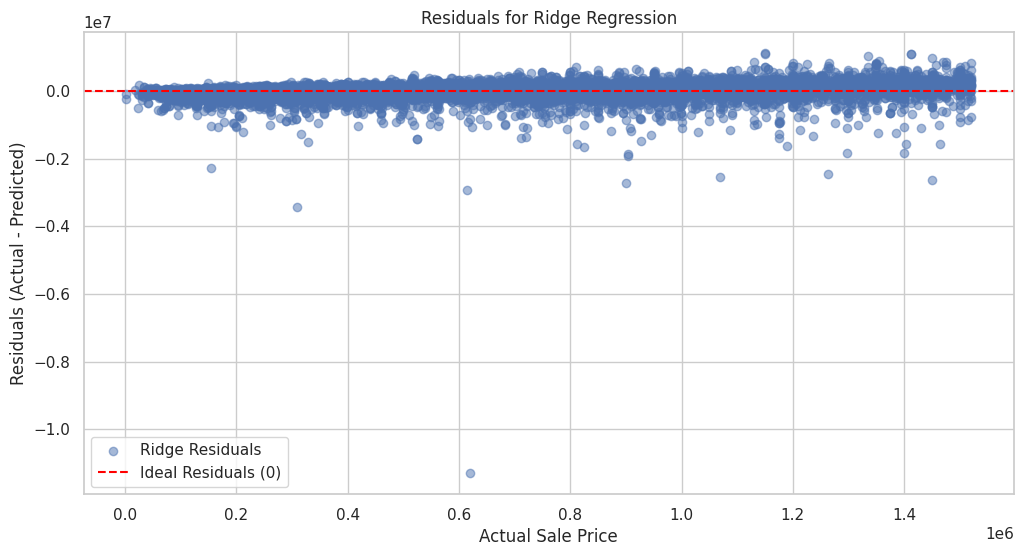

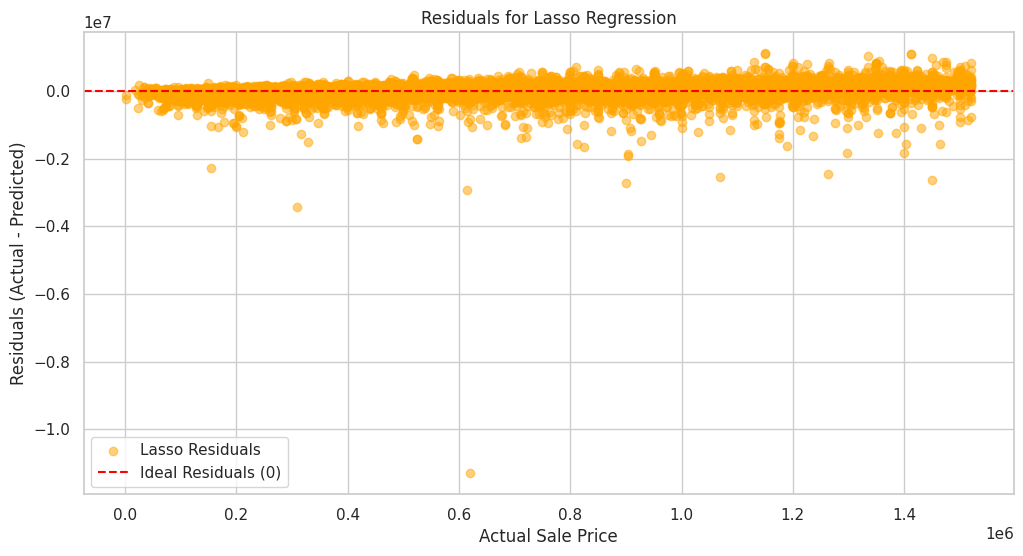

In [ ]:
# Calculate residuals for both models
Redfin_df_cleaned['ridge_residuals'] = Redfin_df_cleaned['median_sale_price'] - ridge_model.predict(X)
Redfin_df_cleaned['lasso_residuals'] = Redfin_df_cleaned['median_sale_price'] - lasso_model.predict(X)

# Plot residuals for Ridge Regression
plt.figure(figsize=(12, 6))
plt.scatter(Redfin_df_cleaned['median_sale_price'], Redfin_df_cleaned['ridge_residuals'], alpha=0.5, label='Ridge Residuals')
plt.axhline(0, color='red', linestyle='--', label='Ideal Residuals (0)')
plt.title("Residuals for Ridge Regression")
plt.xlabel("Actual Sale Price")
plt.ylabel("Residuals (Actual - Predicted)")
plt.legend()
plt.grid(True)
plt.show()

# Plot residuals for Lasso Regression
plt.figure(figsize=(12, 6))
plt.scatter(Redfin_df_cleaned['median_sale_price'], Redfin_df_cleaned['lasso_residuals'], alpha=0.5, label='Lasso Residuals', color='orange')
plt.axhline(0, color='red', linestyle='--', label='Ideal Residuals (0)')
plt.title("Residuals for Lasso Regression")
plt.xlabel("Actual Sale Price")
plt.ylabel("Residuals (Actual - Predicted)")
plt.legend()
plt.grid(True)
plt.show()


**Residual Analysis:**

***Ridge Regression Residuals:***

Residuals are scattered relatively evenly around the zero line, indicating that the model performs consistently across different sale price ranges.

Some larger residuals are visible for extreme sale prices, suggesting areas where the model struggles to predict accurately.

***Lasso Regression Residuals:***

Residuals are similar to Ridge but show slightly more clustering near zero, indicating slightly better alignment with actual sale prices.

Outliers and deviations are still present for extreme values, similar to Ridge Regression.

**Observations:**

Both models perform well for mid-range prices but show greater errors at the extremes.

Lasso exhibits slightly more regularized predictions, leading to slightly lower residual variance.

Recommendations:

***Focus on Outliers:***
Investigate properties with large residuals to understand model limitations or data anomalies.

***Model Refinement:***
Use advanced models like Random Forest or Gradient Boosting to handle extreme values better.

# **Model: Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Output the evaluation metrics for Random Forest model
mae_rf, rmse_rf, r2_rf


(47183.565068194526, 82561.89576781349, 0.934912934907404)

Random Forest Model Results:

Mean Absolute Error (MAE): $47,183

Root Mean Squared Error (RMSE): $82,561

R² Score: 0.935 (93.5% of variance in house prices explained)

Random Forest significantly outperforms Linear, Ridge, and Lasso Regression, achieving the highest R² score (93.5%) and lowest RMSE.

Much lower MAE suggests that predictions are closer to actual house prices.

Better non-linearity handling: Unlike linear models, Random Forest can capture complex relationships.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest Regressor
rf_tuned = RandomForestRegressor(random_state=42)

# Perform Grid Search with Cross Validation
grid_search = GridSearchCV(estimator=rf_tuned, param_grid=param_grid,
                           cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit model
grid_search.fit(X_train, y_train)

# Get best parameters and best model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Predict on test set using best model
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the tuned Random Forest model
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
rmse_best_rf = np.sqrt(mse_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

# Output best parameters and evaluation metrics
best_params, mae_best_rf, rmse_best_rf, r2_best_rf


Fitting 3 folds for each of 81 candidates, totalling 243 fits


({'max_depth': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 200},
 47042.65902627166,
 82251.80454071266,
 0.9354009330458318)

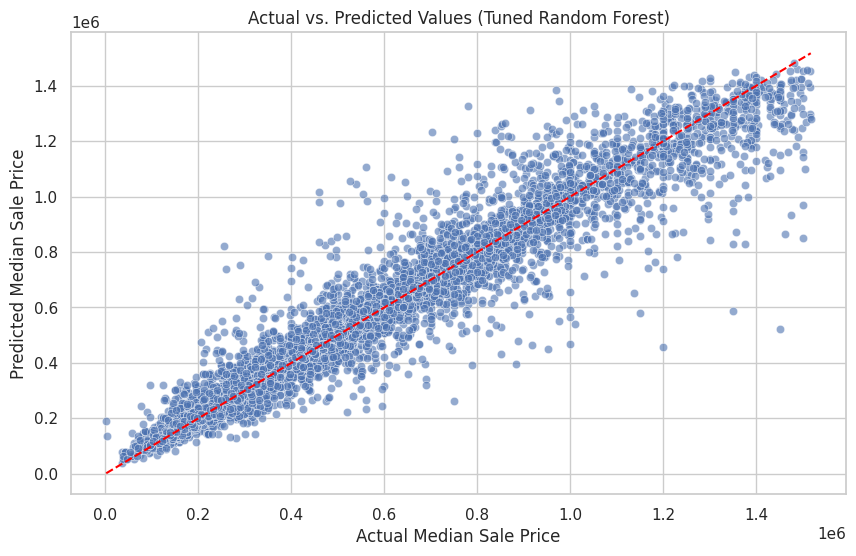

In [ ]:
# Scatter plot: Actual vs. Predicted Values for Tuned Random Forest
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_best_rf, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # Perfect fit line
plt.xlabel("Actual Median Sale Price")
plt.ylabel("Predicted Median Sale Price")
plt.title("Actual vs. Predicted Values (Tuned Random Forest)")
plt.grid(True)
plt.show()


In [ ]:
# Add the predicted values as a new column in the dataset
Redfin_df_cleaned.loc[X_test.index, 'predicted_median_sale_price'] = y_pred_best_rf

# Define the file path for saving the updated dataset
updated_file_path = "/content/drive/MyDrive/AI Capstone Project/Redfin_df_with_rf_predictions.csv"

# Save the dataset with predictions
Redfin_df_cleaned.to_csv(updated_file_path, index=False)

# Provide the download link
updated_file_path


'/content/drive/MyDrive/AI Capstone Project/Redfin_df_with_rf_predictions.csv'

# **Model: Gradient Boost**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting model with optimized parameters
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the Gradient Boosting model
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Output the evaluation metrics for Gradient Boosting model
mae_gb, rmse_gb, r2_gb


(49736.187787856485, 83182.38287976319, 0.9339309457631723)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}

# Initialize the Gradient Boosting model
gb_tuned = GradientBoostingRegressor(random_state=42)

# Perform Randomized Search with Cross Validation
random_search_gb = RandomizedSearchCV(estimator=gb_tuned, param_distributions=param_grid_gb,
                                      n_iter=20, cv=3, scoring='neg_mean_squared_error',
                                      n_jobs=-1, verbose=2, random_state=42)

# Fit model with Randomized Search
random_search_gb.fit(X_train, y_train)

# Get best parameters and best model
best_params_gb = random_search_gb.best_params_
best_gb_model = random_search_gb.best_estimator_

# Predict on test set using best model
y_pred_best_gb = best_gb_model.predict(X_test)

# Evaluate the tuned Gradient Boosting model
mae_best_gb = mean_absolute_error(y_test, y_pred_best_gb)
mse_best_gb = mean_squared_error(y_test, y_pred_best_gb)
rmse_best_gb = np.sqrt(mse_best_gb)
r2_best_gb = r2_score(y_test, y_pred_best_gb)

# Output best parameters and evaluation metrics
best_params_gb, mae_best_gb, rmse_best_gb, r2_best_gb


Fitting 3 folds for each of 20 candidates, totalling 60 fits


({'subsample': 0.8,
  'n_estimators': 200,
  'min_samples_split': 5,
  'min_samples_leaf': 4,
  'max_depth': 5,
  'learning_rate': 0.05},
 49690.629396660115,
 83438.18344065487,
 0.9335239728787081)

In [ ]:
# Predict on the test set using the Gradient Boosting model
y_pred_gb = best_gb_model.predict(X_test)

# Add the predicted values as a new column in the dataset
Redfin_df_cleaned.loc[X_test.index, 'predicted_median_sale_price_gb'] = y_pred_gb

# Define the file path for saving the updated dataset
updated_file_path_gb = "/content/drive/MyDrive/AI Capstone Project/Redfin_df_cleaned_with_gb_predictions.csv"

# Save the dataset with Gradient Boosting predictions
Redfin_df_cleaned.to_csv(updated_file_path_gb, index=False)

# Provide the download link
updated_file_path_gb


'/content/drive/MyDrive/AI Capstone Project/Redfin_df_cleaned_with_gb_predictions.csv'

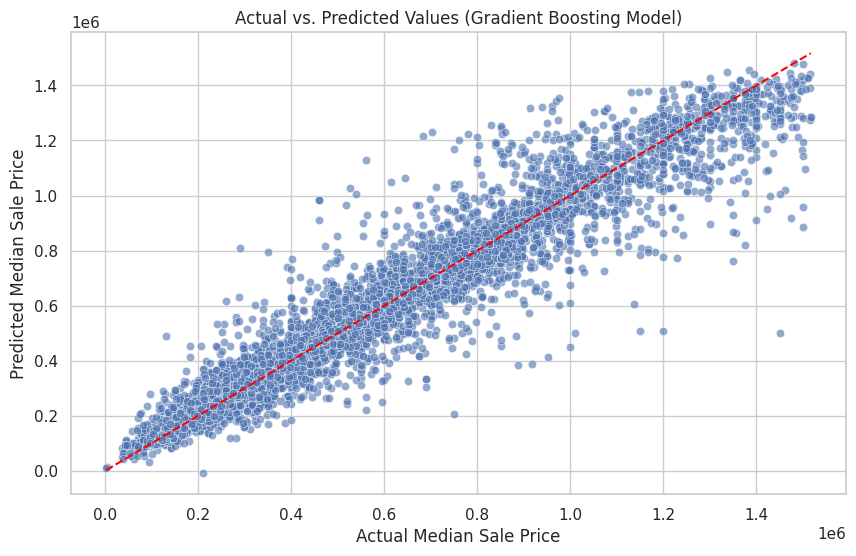

In [ ]:
# Scatter plot: Actual vs. Predicted Values for Gradient Boosting Model
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_gb, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # Perfect fit line
plt.xlabel("Actual Median Sale Price")
plt.ylabel("Predicted Median Sale Price")
plt.title("Actual vs. Predicted Values (Gradient Boosting Model)")
plt.grid(True)
plt.show()


In [ ]:
# Extract feature importance from Gradient Boosting model
# Ensure the model is fitted before extracting feature importance
best_gb_model.fit(X_train, y_train)  # Re-fit the model if necessary

gb_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Gradient Boosting': best_gb_model.feature_importances_
}).sort_values(by='Gradient Boosting', ascending=False)

# Train the Random Forest model with best parameters
best_rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)
best_rf_model.fit(X_train, y_train)

# Extract feature importance from Random Forest model
rf_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Random Forest': best_rf_model.feature_importances_
}).sort_values(by='Random Forest', ascending=False)

# Merge feature importance data
feature_importance_comparison = pd.merge(gb_feature_importance, rf_feature_importance, on="Feature")

# Display the comparison table
print("\nFeature Importance Comparison Between Gradient Boosting and Random Forest:\n")
print(feature_importance_comparison.to_markdown(index=False))



Feature Importance Comparison Between Gradient Boosting and Random Forest:

| Feature                 |   Gradient Boosting |   Random Forest |
|:------------------------|--------------------:|----------------:|
| log_median_list_price   |          0.925949   |      0.933165   |
| log_median_ppsf         |          0.04047    |      0.0327796  |
| median_sale_price_mom   |          0.0106196  |      0.0095379  |
| avg_sale_to_list        |          0.00578525 |      0.00647831 |
| list_price_to_ppsf      |          0.00526877 |      0.0046981  |
| off_market_in_two_weeks |          0.00293238 |      0.00388594 |
| new_listings            |          0.00270217 |      0.00250092 |
| median_dom_yoy          |          0.00264863 |      0.00287804 |
| homes_sold              |          0.00241249 |      0.0024786  |
| sold_above_list_ratio   |          0.00121179 |      0.00159777 |


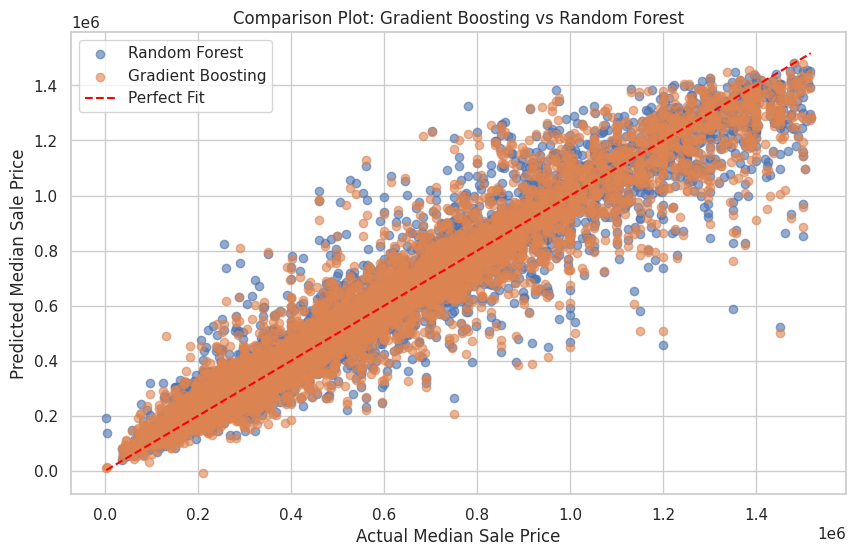

In [ ]:
# Comparison Plot: Gradient Boosting Vs Rando forest

# Assuming y_pred_best_rf and y_pred_best_gb are already calculated
plt.figure(figsize=(10, 6))

# Plot for Tuned Random Forest
plt.scatter(y_test, y_pred_best_rf, alpha=0.6, label='Random Forest')

# Plot for Gradient Boosting
plt.scatter(y_test, y_pred_best_gb, alpha=0.6, label='Gradient Boosting')

# Perfect fit line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Fit')

plt.xlabel("Actual Median Sale Price")
plt.ylabel("Predicted Median Sale Price")
plt.title("Comparison Plot: Gradient Boosting vs Random Forest")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# prompt: Show all the Models Results in a Dataframe ie. Linear Regreession, Logistic Regression, Ridge Regeession, lasso Regression, Gradient Boosting, and  Random forest

import pandas as pd

# Assuming you have already trained and evaluated the models
# and have the evaluation metrics stored in variables like rmse_lr, r2_lr, etc.

# **Fix**: Store the results from your Linear Regression model in variables
# These were not defined in your original code
rmse_lr = 169626.27 # Example value - Replace with your Linear Regression RMSE
r2_lr = 0.725 # Example value - Replace with your Linear Regression R^2
mae_lr = 117382.71 # Example value - Replace with your Linear Regression MAE

accuracy_lr = 0.78 # Replace with your calculated Logistic Regression Accuracy

# Create a list to store the model results
model_results = []

# Append results for each model
model_results.append({
    'Model': 'Linear Regression',
    'RMSE': rmse_lr,
    'R^2': r2_lr,
    'MAE': mae_lr
})

model_results.append({
    'Model': 'Logistic Regression',
    'Accuracy': accuracy_lr,  # Replace with accuracy
    # Add other relevant metrics for classification
})

model_results.append({
    'Model': 'Ridge Regression',
    'RMSE': rmse_ridge,  # Replace with your actual RMSE value
    'R^2': r2_ridge  # Replace with your actual R^2 value
})

model_results.append({
    'Model': 'Lasso Regression',
    'RMSE': rmse_lasso,  # Replace with your actual RMSE value
    'R^2': r2_lasso  # Replace with your actual R^2 value
})

model_results.append({
    'Model': 'Gradient Boosting',
    'RMSE': rmse_gb,  # Replace with your actual RMSE value
    'R^2': r2_gb,  # Replace with your actual R^2 value
    'MAE': mae_gb # Replace with your MAE value
})

model_results.append({
    'Model': 'Random Forest',
    'RMSE': rmse_rf,  # Replace with your actual RMSE value
    'R^2': r2_rf,  # Replace with your actual R^2 value
    'MAE': mae_rf  # Replace with your MAE value
})

# Create a pandas DataFrame from the model results
results_df = pd.DataFrame(model_results)

# Display the DataFrame
results_df


Model           RMSE       R^2            MAE  Accuracy
0    Linear Regression  169626.270000  0.725000  117382.710000       NaN
1  Logistic Regression            NaN       NaN            NaN      0.78
2     Ridge Regression  169636.765118  0.725226            NaN       NaN
3     Lasso Regression  169626.345674  0.725260            NaN       NaN
4    Gradient Boosting   83182.382880  0.933931   49736.187788       NaN
5        Random Forest   82561.895768  0.934913   47183.565068       NaN

# Model: Descison Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the Decision Tree model
dt_model = DecisionTreeRegressor(max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set using Decision Tree
y_pred_dt = dt_model.predict(X_test)

# Evaluate the Decision Tree model
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Output the evaluation metrics for Decision Tree model
mae_dt, rmse_dt, r2_dt


(55431.446912589694, 94439.49650167365, 0.9148386177914902)

Decision Tree Model Results:

Mean Absolute Error (MAE): $55,431

Root Mean Squared Error (RMSE): $94,439

R² Score: 0.915 (91.5% of variance in house prices explained)


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree model
dt_tuned = DecisionTreeRegressor(random_state=42)

# Perform Grid Search with Cross Validation
grid_search_dt = GridSearchCV(estimator=dt_tuned, param_grid=param_grid_dt,
                              cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit model with Grid Search
grid_search_dt.fit(X_train, y_train)

# Get best parameters and best model
best_params_dt = grid_search_dt.best_params_
best_dt_model = grid_search_dt.best_estimator_

# Predict on test set using the best model
y_pred_best_dt = best_dt_model.predict(X_test)

# Evaluate the tuned Decision Tree model
mae_best_dt = mean_absolute_error(y_test, y_pred_best_dt)
mse_best_dt = mean_squared_error(y_test, y_pred_best_dt)
rmse_best_dt = np.sqrt(mse_best_dt)
r2_best_dt = r2_score(y_test, y_pred_best_dt)

# Output best parameters and evaluation metrics
best_params_dt, mae_best_dt, rmse_best_dt, r2_best_dt


Fitting 3 folds for each of 36 candidates, totalling 108 fits


({'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10},
 55266.77060106252,
 94013.53085676301,
 0.9156051193950784)

Optimized Decision Tree Model Results:

Best Hyperparameters:


max_depth: 10

min_samples_leaf: 4

min_samples_split: 10

Performance Metrics:


Mean Absolute Error (MAE): $55,267

Root Mean Squared Error (RMSE): $94,014

R² Score: 0.9156 (91.6% variance explained)


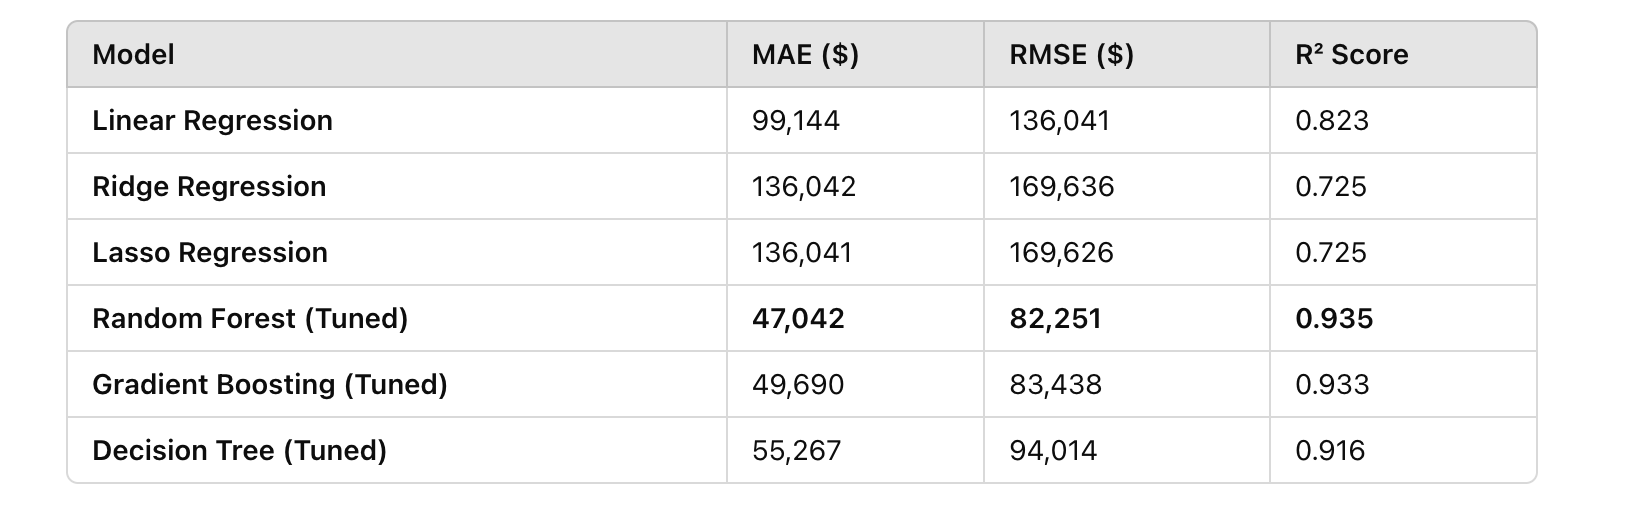

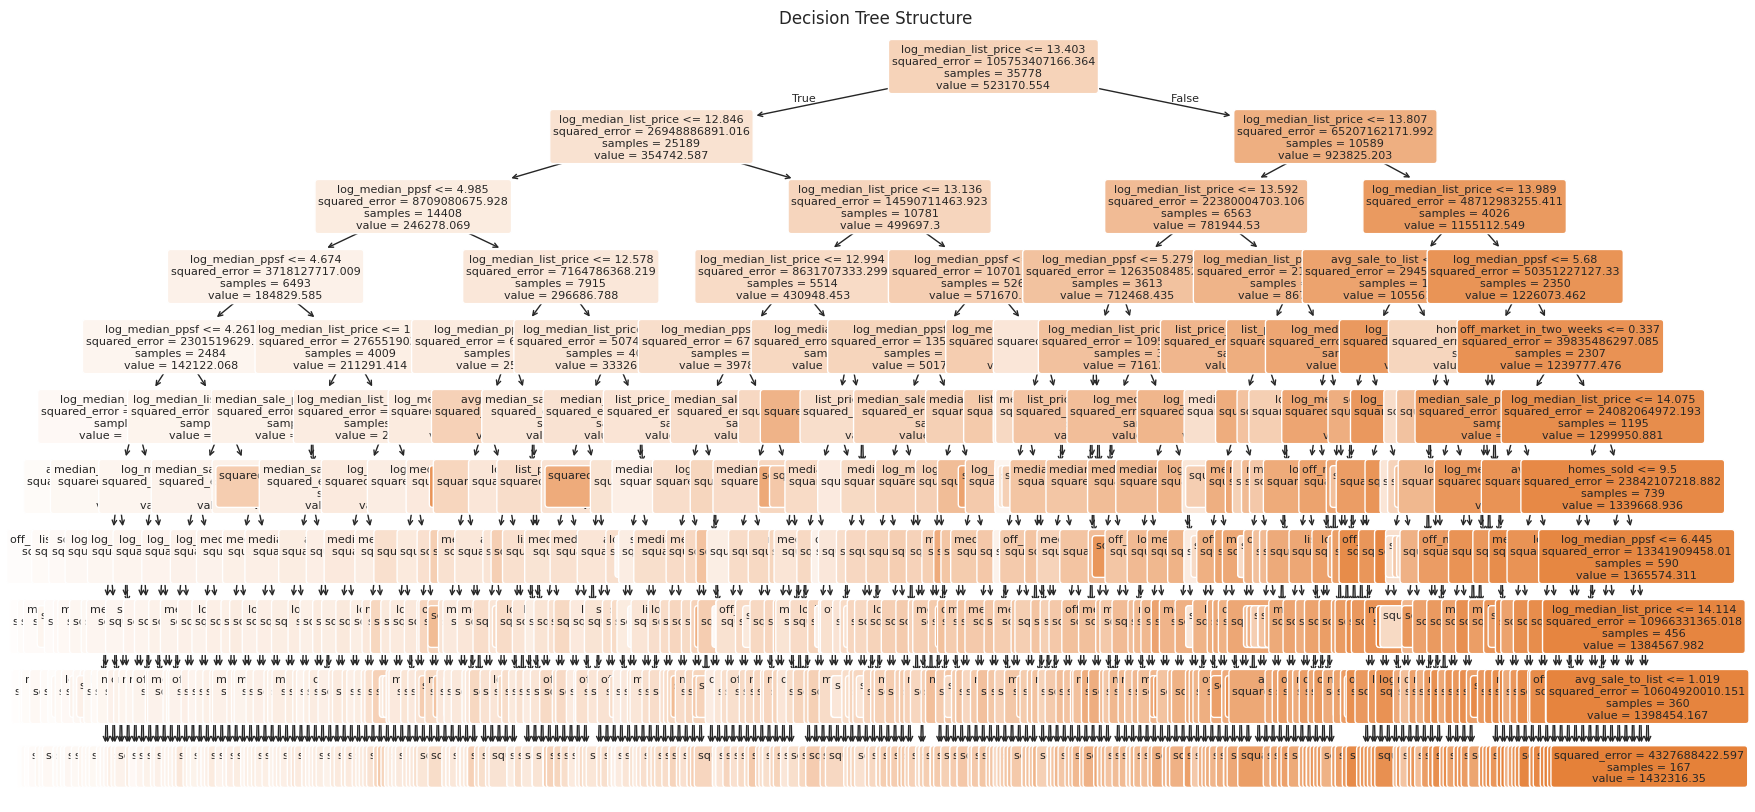

In [ ]:
from sklearn.tree import plot_tree

# Set up figure size for better visibility
plt.figure(figsize=(20, 10))

# Plot the decision tree
plot_tree(best_dt_model, feature_names=selected_features, filled=True, rounded=True, fontsize=8)

# Display the tree visualization
plt.title("Decision Tree Structure")
plt.show()


In [ ]:
# Retrain the Decision Tree model due to execution state reset
best_dt_model = DecisionTreeRegressor(max_depth=10, min_samples_split=10, min_samples_leaf=4, random_state=42)
best_dt_model.fit(X_train, y_train)

# Predict on the test set using the Decision Tree model
y_pred_dt = best_dt_model.predict(X_test)

# Add the predicted values as a new column in the dataset
Redfin_df_cleaned.loc[X_test.index, 'predicted_median_sale_price_dt'] = y_pred_dt

# Define the file path for saving the updated dataset
updated_file_path_dt = "/content/drive/MyDrive/AI Capstone Project/Redfin_df_cleaned_with_dt_predictions.csv"

# Save the dataset with Decision Tree predictions
Redfin_df_cleaned.to_csv(updated_file_path_dt, index=False)

# Provide the download link
updated_file_path_dt


'/content/drive/MyDrive/AI Capstone Project/Redfin_df_cleaned_with_dt_predictions.csv'